In [1]:
#import libraries for data exploration

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Load and read data

df=pd.read_excel('dataset/online_retail_II.xlsx')
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [3]:
#Summary of dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


In [4]:
#Check for null values

df.isnull().sum()

Invoice             0
StockCode           0
Description      2928
Quantity            0
InvoiceDate         0
Price               0
Customer ID    107927
Country             0
dtype: int64

In [5]:
#Checking null values where description is null

df[df['Description'].isnull()].isnull().sum()

Invoice           0
StockCode         0
Description    2928
Quantity          0
InvoiceDate       0
Price             0
Customer ID    2928
Country           0
dtype: int64

In [6]:
#Summary statistics

df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,525461.000000,525461,525461.000000,417534.000000
mean,10.337667,2010-06-28 11:37:36.845017856,4.688834,15360.645478
min,-9600.000000,2009-12-01 07:45:00,-53594.360000,12346.000000
25%,1.000000,2010-03-21 12:20:00,1.250000,13983.000000
50%,3.000000,2010-07-06 09:51:00,2.100000,15311.000000
75%,10.000000,2010-10-15 12:45:00,4.210000,16799.000000
max,19152.000000,2010-12-09 20:01:00,25111.090000,18287.000000
std,107.424110,NaN,146.126914,1680.811316


In [7]:
#How can quantity have negative value?

df[df['Quantity']<0].head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.0,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.0,Australia
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.0,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.0,Australia


In [8]:
#Checking rows where price is null

df[df['Price']==0].head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
263,489464,21733,85123a mixed,-96,2009-12-01 10:52:00,0.0,NaN,United Kingdom
283,489463,71477,short,-240,2009-12-01 10:52:00,0.0,NaN,United Kingdom
284,489467,85123A,21733 mixed,-192,2009-12-01 10:53:00,0.0,NaN,United Kingdom
470,489521,21646,NaN,-50,2009-12-01 11:44:00,0.0,NaN,United Kingdom
3114,489655,20683,NaN,-44,2009-12-01 17:26:00,0.0,NaN,United Kingdom
3161,489659,21350,NaN,230,2009-12-01 17:39:00,0.0,NaN,United Kingdom
3162,489660,35956,lost,-1043,2009-12-01 17:43:00,0.0,NaN,United Kingdom
3168,489663,35605A,damages,-117,2009-12-01 18:02:00,0.0,NaN,United Kingdom
3731,489781,84292,NaN,17,2009-12-02 11:45:00,0.0,NaN,United Kingdom
4296,489806,18010,NaN,-770,2009-12-02 12:42:00,0.0,NaN,United Kingdom


In [9]:
#As per the observation, Invoice values usually are 6digit numbers

df['Invoice']=df['Invoice'].astype('str')

df[df['Invoice'].str.match(r'^\d{6}$')].head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [10]:
df['Invoice'].str.replace('[0-9]','', regex=True).unique()

#So its clear now that we either have 6digit invoice number, or Cancelled invoices that starts with alphabet 'C'

array(['', 'C', 'A'], dtype=object)

In [11]:
df['StockCode']=df['StockCode'].astype('str')

df[~df['StockCode'].str.match(r'^\d{5}$')].head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
12,489436,48173C,DOOR MAT BLACK FLOCK,10,2009-12-01 09:06:00,5.95,13078.0,United Kingdom
23,489436,35004B,SET OF 3 BLACK FLYING DUCKS,12,2009-12-01 09:06:00,4.65,13078.0,United Kingdom
28,489436,84596F,SMALL MARSHMALLOWS PINK BOWL,8,2009-12-01 09:06:00,1.25,13078.0,United Kingdom


In [12]:
df['StockCode'].str.replace('[0-9]','',regex=True).unique()

array(['', 'P', 'W', 'C', 'B', 'F', 'L', 'S', 'A', 'N', 'POST', 'E', 'J',
       'D', 'G', 'LP', 'BL', 'K', 'H', 'GR', 'M', 'DCGS', 'DOT', 'U', 'b',
       'w', 'c', 'a', 'f', 'bl', 's', 'p', 'R', 'V', 'T', 'I',
       'BANK CHARGES', 'O', 'Z', 'TEST', 'gift__', 'DCGSN', 'm', 'PADS',
       'Y', 'HC', 'e', 'd', 'ADJUST', 'DCGSSGIRL', 'GIFT', 'DCGSLBOY',
       'k', 'g', 'DCGSSBOY', 'DCGSLGIRL', 'j', 'l', 'n', 'J ', 'SP',
       'AMAZONFEE'], dtype=object)

In [13]:
#Checking where stockcode does not start with number

df[df['StockCode'].str.match(r'^[^\d]')]['StockCode'].unique()

array(['POST', 'D', 'DCGS0058', 'DCGS0068', 'DOT', 'M', 'DCGS0004',
       'DCGS0076', 'C2', 'BANK CHARGES', 'DCGS0003', 'TEST001',
       'gift_0001_80', 'DCGS0072', 'gift_0001_20', 'DCGS0044', 'TEST002',
       'gift_0001_10', 'gift_0001_50', 'DCGS0066N', 'gift_0001_30',
       'PADS', 'ADJUST', 'gift_0001_40', 'gift_0001_60', 'gift_0001_70',
       'gift_0001_90', 'DCGSSGIRL', 'DCGS0006', 'DCGS0016', 'DCGS0027',
       'DCGS0036', 'DCGS0039', 'DCGS0060', 'DCGS0056', 'DCGS0059', 'GIFT',
       'DCGSLBOY', 'm', 'DCGS0053', 'DCGS0062', 'DCGS0037', 'DCGSSBOY',
       'DCGSLGIRL', 'S', 'DCGS0069', 'DCGS0070', 'DCGS0075', 'B',
       'DCGS0041', 'ADJUST2', 'C3', 'SP1002', 'AMAZONFEE'], dtype=object)

In [14]:
#So from above codes, 'PADS', 'SP1002' are legit and should be included.

df[df['StockCode'].str.match(r'^PADS') | df['StockCode'].str.match(r'^SP1002')]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
62299,494914,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-01-19 17:04:00,0.001,16705.0,United Kingdom
74731,496222,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-01-29 13:53:00,0.001,13583.0,United Kingdom
77702,496473,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-02-01 15:38:00,0.001,17350.0,United Kingdom
79794,496643,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-02-03 11:58:00,0.001,13408.0,United Kingdom
90798,497935,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-02-15 10:47:00,0.001,13408.0,United Kingdom
97716,498562,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-02-21 12:03:00,0.001,15182.0,United Kingdom
101718,499056,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-02-24 13:46:00,0.001,13765.0,United Kingdom
104480,499399,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-02-26 13:26:00,0.001,14459.0,United Kingdom
123947,501176,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-03-15 11:00:00,0.001,14857.0,United Kingdom
156809,504332,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-04-12 16:30:00,0.001,12671.0,Germany


## Data Cleaning

In [16]:
cleaned_df=df.copy()

In [17]:
# we can see since we dont have customerID where we dont have description, so we can drop these rows and also removing the rows where we dont have customer ID

cleaned_df=df[~df['Description'].isnull()]
cleaned_df=df[~df['Customer ID'].isnull()]

In [18]:
cleaned_df.shape

(417534, 8)

In [19]:
#Removing cancelled invoices (that starts with C)

cleaned_df=cleaned_df[cleaned_df['Invoice'].str.match(r'^\d')]

In [20]:
cleaned_df.shape

(407695, 8)

In [21]:
#Only keeping those stockcodes which are valid

mask=(
        cleaned_df['StockCode'].str.match(r'^\d{5}$') 
      | cleaned_df['StockCode'].str.match(r'^d{5}[a-zA-Z]+$') 
      | cleaned_df['StockCode'].str.match(r'^PADS') 
      | cleaned_df['StockCode'].str.match(r'^SP1')
     )

cleaned_df=cleaned_df[mask]

In [22]:
cleaned_df.shape

(350945, 8)

In [23]:
cleaned_df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,350945.000000,350945,350945.000000,350945.000000
mean,13.699543,2010-07-05 17:10:20.922594816,2.979564,15360.244064
min,1.000000,2009-12-01 07:45:00,0.000000,12346.000000
25%,2.000000,2010-03-31 17:29:00,1.250000,13985.000000
50%,5.000000,2010-07-18 13:42:00,1.950000,15311.000000
75%,12.000000,2010-10-17 14:26:00,3.750000,16797.000000
max,19152.000000,2010-12-09 20:01:00,295.000000,18287.000000
std,100.074534,NaN,4.424660,1678.209171


In [24]:
#Removing rows where price equals zero

cleaned_df=cleaned_df[cleaned_df['Price']!=0]

In [25]:
cleaned_df.shape

(350918, 8)

In [26]:
cleaned_df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,350918.000000,350918,350918.000000,350918.000000
mean,13.699995,2010-07-05 17:15:01.974307584,2.979793,15360.352319
min,1.000000,2009-12-01 07:45:00,0.001000,12346.000000
25%,2.000000,2010-03-31 17:29:00,1.250000,13985.000000
50%,5.000000,2010-07-18 13:42:00,1.950000,15311.000000
75%,12.000000,2010-10-17 14:26:00,3.750000,16797.000000
max,19152.000000,2010-12-09 20:01:00,295.000000,18287.000000
std,100.078312,NaN,4.424753,1678.169207


In [27]:
#how much % of data we have from original data after data cleaning

round(
(len(cleaned_df)/len(df))*100,2)

66.78

### Dropped 33.22% of records while data cleaning.

In [29]:
cleaned_df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
5,489434,22064,PINK DOUGHNUT TRINKET POT,24,2009-12-01 07:45:00,1.65,13085.0,United Kingdom
6,489434,21871,SAVE THE PLANET MUG,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


## Feature Engineering

In [31]:
#Adding SalesRevenue column

cleaned_df['SalesRevenue']=cleaned_df['Quantity']*cleaned_df['Price']

In [32]:
cleaned_df=cleaned_df.reset_index(drop=True)

In [33]:
cleaned_df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,SalesRevenue
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4
1,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8
2,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0
3,489434,22064,PINK DOUGHNUT TRINKET POT,24,2009-12-01 07:45:00,1.65,13085.0,United Kingdom,39.6
4,489434,21871,SAVE THE PLANET MUG,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0


In [34]:
#Aggregating dataset on Monetary, Frequency and Recency

aggregated_df= cleaned_df.groupby(by='Customer ID', as_index=False)\
.agg(
    MonetaryValue=('SalesRevenue','sum'),
    Frequency=('Invoice','nunique'),
    LastInvoiceDate=('InvoiceDate','max')
)

aggregated_df.head()

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate
0,12346.0,144.02,2,2010-06-28 13:53:00
1,12347.0,966.87,2,2010-12-07 14:57:00
2,12348.0,221.16,1,2010-09-27 14:59:00
3,12349.0,1946.64,2,2010-10-28 08:23:00
4,12351.0,300.93,1,2010-11-29 15:23:00


In [35]:
max_invoice_date=aggregated_df['LastInvoiceDate'].max()
max_invoice_date

Timestamp('2010-12-09 20:01:00')

In [36]:
aggregated_df['Recency']= (max_invoice_date-aggregated_df['LastInvoiceDate']).dt.days

In [37]:
aggregated_df.describe()

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
count,4248.000000,4248.000000,4248.000000,4248,4248.000000
mean,15353.896422,1728.341289,4.376412,2010-09-11 03:14:47.161016832,89.417137
min,12346.000000,2.950000,1.000000,2009-12-01 12:55:00,0.000000
25%,13888.750000,263.895000,1.000000,2010-07-27 14:28:00,17.000000
50%,15358.500000,616.085000,2.000000,2010-10-19 14:09:00,51.000000
75%,16836.500000,1478.380000,5.000000,2010-11-22 12:04:15,135.000000
max,18287.000000,299485.800000,182.000000,2010-12-09 20:01:00,373.000000
std,1699.238394,7531.001103,7.762138,NaN,96.377474


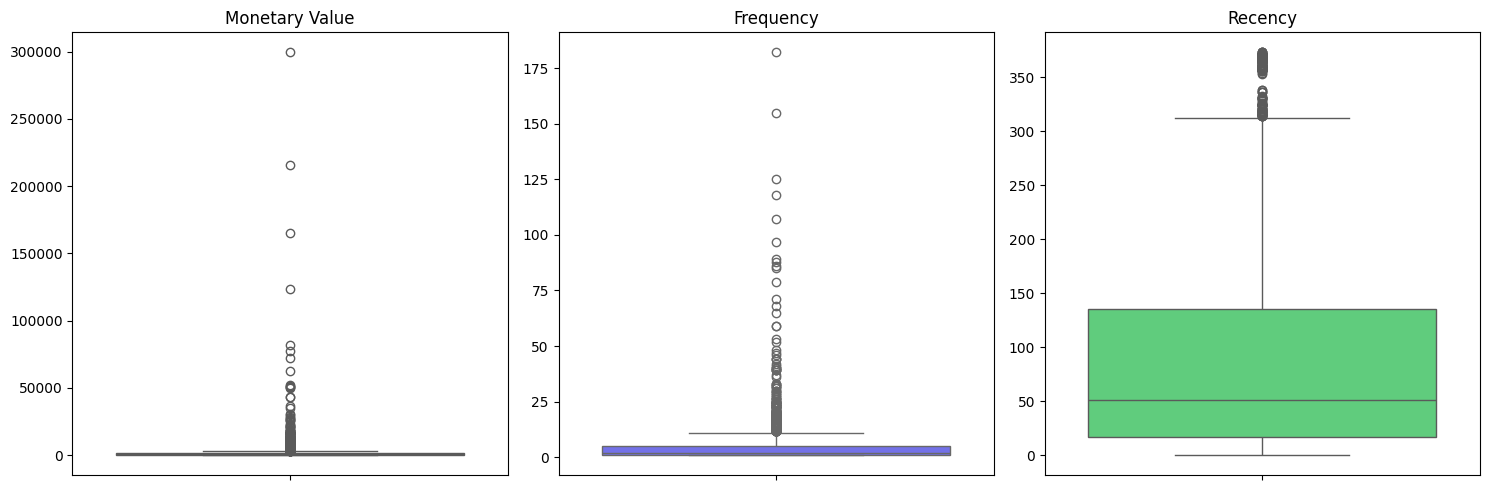

In [38]:
#Checking Outliers, because with outliers it will negatively impact clustering

fig,ax=plt.subplots(1,3, figsize=(15,5))

sns.boxplot(y='MonetaryValue', data=aggregated_df, ax=ax[0],color='#f73455')
ax[0].set_title('Monetary Value')
ax[0].set_ylabel('')  # Remove the y-axis label

sns.boxplot(y='Frequency', data=aggregated_df, ax=ax[1],color='#605dfc')
ax[1].set_title('Frequency')
ax[1].set_ylabel('')  # Remove the y-axis label

sns.boxplot(y='Recency', data=aggregated_df, ax=ax[2],color='#4ede74')
ax[2].set_title('Recency')
ax[2].set_ylabel('')  # Remove the y-axis label

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

In [39]:
#Seperating Monetary outliers

M_Q1=aggregated_df['MonetaryValue'].quantile(.25)
M_Q3=aggregated_df['MonetaryValue'].quantile(.75)
M_IQR=M_Q3-M_Q1

monetary_outliers_df=aggregated_df[(aggregated_df['MonetaryValue']>(M_Q3+(1.5*M_IQR))) | (aggregated_df['MonetaryValue']<(M_Q1-(1.5*M_IQR)))].copy()

In [40]:
monetary_outliers_df.describe()

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
count,412.000000,412.000000,412.000000,412,412.000000
mean,15083.296117,10433.221738,17.033981,2010-11-10 21:01:28.106796032,28.674757
min,12357.000000,3308.900000,1.000000,2009-12-10 18:03:00,0.000000
25%,13561.750000,3957.300000,8.000000,2010-11-08 13:45:45,3.000000
50%,14956.500000,5389.850000,12.000000,2010-11-26 15:03:30,13.000000
75%,16653.000000,8847.182500,18.000000,2010-12-06 12:47:30,31.000000
max,18260.000000,299485.800000,182.000000,2010-12-09 19:32:00,364.000000
std,1733.822102,22291.564007,19.376882,NaN,49.154417


In [41]:
#Seperating frequency outliers

F_Q1=aggregated_df['Frequency'].quantile(.25)
F_Q3=aggregated_df['Frequency'].quantile(.75)
F_IQR=F_Q3-F_Q1

frequency_outliers_df=aggregated_df[(aggregated_df['Frequency']>(F_Q3+(1.5*F_IQR))) | (aggregated_df['Frequency']<(F_Q1-(1.5*F_IQR)))].copy()

In [42]:
frequency_outliers_df.describe()

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
count,269.000000,269.000000,269.000000,269,269.000000
mean,15392.802974,12299.035558,23.698885,2010-11-23 16:23:39.033456896,15.866171
min,12437.000000,898.140000,12.000000,2010-05-12 16:51:00,0.000000
25%,13831.000000,3638.010000,13.000000,2010-11-21 10:38:00,2.000000
50%,15527.000000,5572.670000,17.000000,2010-12-02 12:09:00,7.000000
75%,16883.000000,10269.460000,24.000000,2010-12-07 12:43:00,18.000000
max,18260.000000,299485.800000,182.000000,2010-12-09 19:32:00,211.000000
std,1748.380712,27198.773361,21.578787,NaN,26.789616


In [43]:
#Filtering non outliers

non_outliers_df= aggregated_df[(~aggregated_df.index.isin(monetary_outliers_df.index)) & (~aggregated_df.index.isin(frequency_outliers_df.index))].copy()

In [44]:
non_outliers_df.describe()

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
count,3785.000000,3785.000000,3785.000000,3785,3785.000000
mean,15372.177279,773.150842,2.856539,2010-09-03 14:28:03.788639232,96.949538
min,12346.000000,2.950000,1.000000,2009-12-01 12:55:00,0.000000
25%,13909.000000,236.400000,1.000000,2010-07-08 16:56:00,22.000000
50%,15379.000000,508.570000,2.000000,2010-10-12 17:17:00,58.000000
75%,16847.000000,1115.970000,4.000000,2010-11-17 13:42:00,154.000000
max,18287.000000,3298.600000,11.000000,2010-12-09 20:01:00,373.000000
std,1691.821226,714.336213,2.232585,NaN,98.123638


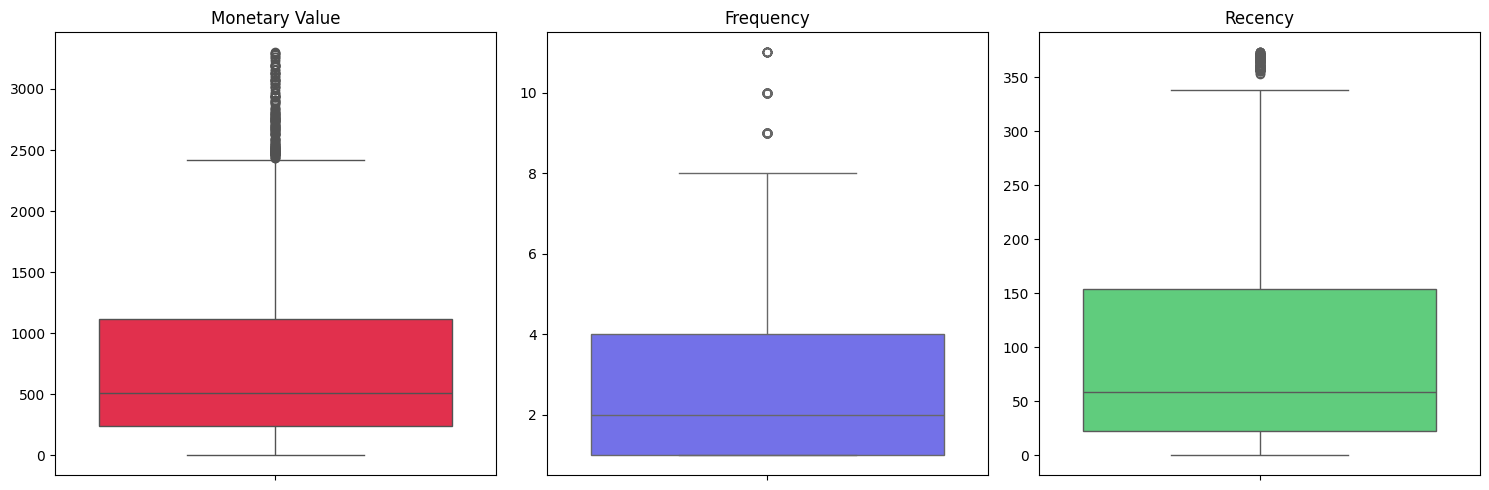

In [45]:
#Checking Outliers, because with outliers it will negatively impact clustering

fig,ax=plt.subplots(1,3, figsize=(15,5))

sns.boxplot(y='MonetaryValue', data=non_outliers_df, ax=ax[0],color='#ff1239')
ax[0].set_title('Monetary Value')
ax[0].set_ylabel('')  # Remove the y-axis label

sns.boxplot(y='Frequency', data=non_outliers_df, ax=ax[1],color='#605dfc')
ax[1].set_title('Frequency')
ax[1].set_ylabel('')  # Remove the y-axis label

sns.boxplot(y='Recency', data=non_outliers_df, ax=ax[2],color='#4ede74')
ax[2].set_title('Recency')
ax[2].set_ylabel('')  # Remove the y-axis label

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

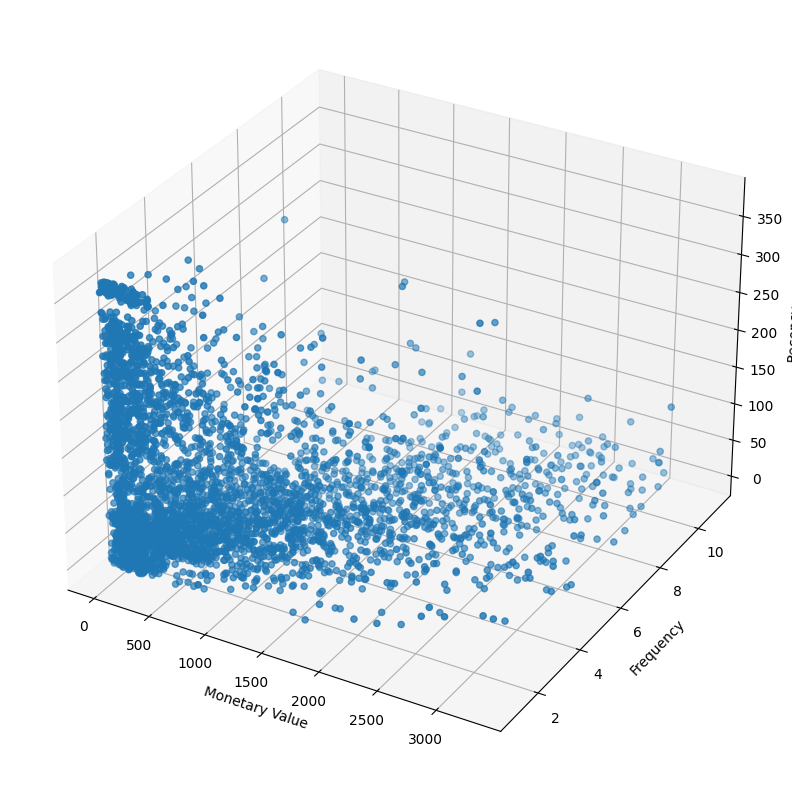

In [46]:
#Plotting 3d graph

fig=plt.figure(figsize=(8,8))
ax=fig.add_subplot(projection='3d')

scatter=ax.scatter(non_outliers_df['MonetaryValue'],non_outliers_df['Frequency'],non_outliers_df['Recency'])

ax.set_xlabel('Monetary Value')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')

plt.tight_layout()
plt.show()

In [47]:
#Since all our features are in different scale, we need to perform scaling.
#Different scales of each feature affects performance of kmeans algorithm

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [48]:
scaled_data=scaler.fit_transform(non_outliers_df[['MonetaryValue','Frequency','Recency']])
scaled_data

array([[-0.88083728, -0.3837042 ,  0.68341659],
       [ 0.27122348, -0.3837042 , -0.96777989],
       [-0.77283465, -0.83167471, -0.24410736],
       ...,
       [-0.57690661, -0.83167471,  2.01864337],
       [ 0.24522388, -0.3837042 ,  0.14321033],
       [ 1.07896109,  0.51223682, -0.81489133]])

In [49]:
scaled_data_df= pd.DataFrame(scaled_data, index=non_outliers_df.index, columns=['MonetaryValue','Frequency','Recency'])
scaled_data_df.head()

,MonetaryValue,Frequency,Recency
0,-0.880837,-0.383704,0.683417
1,0.271223,-0.383704,-0.967780
2,-0.772835,-0.831675,-0.244107
3,1.642986,-0.383704,-0.560077
4,-0.661150,-0.831675,-0.886239


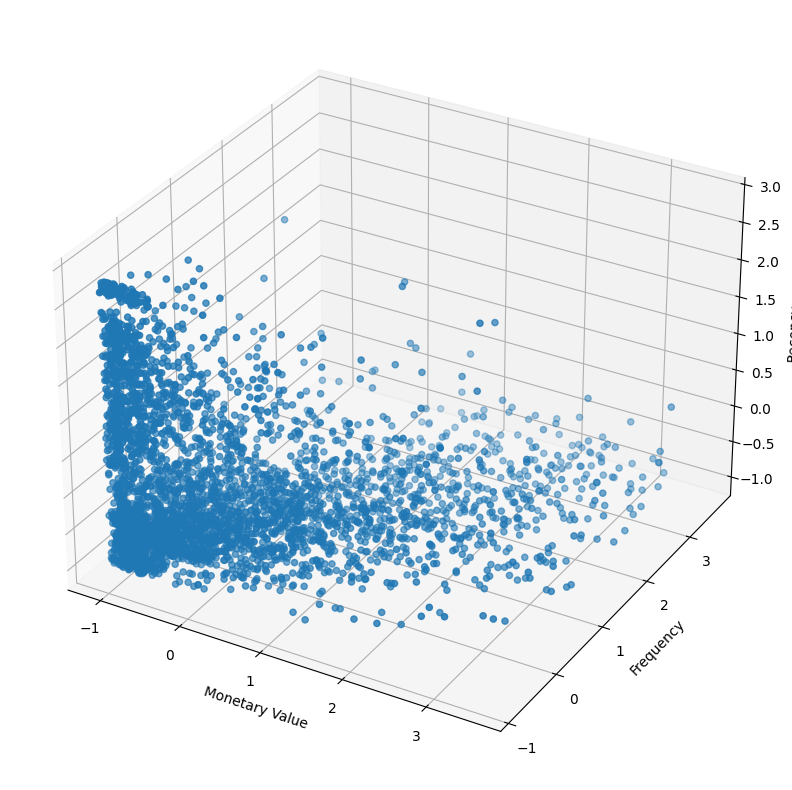

In [50]:
#Plotting 3d graph

fig=plt.figure(figsize=(8,8))
ax=fig.add_subplot(projection='3d')

scatter=ax.scatter(scaled_data_df['MonetaryValue'],scaled_data_df['Frequency'],scaled_data_df['Recency'])

ax.set_xlabel('Monetary Value')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')

plt.tight_layout()
plt.show()

In [51]:
#import libraries for clustering

from sklearn.cluster import KMeans

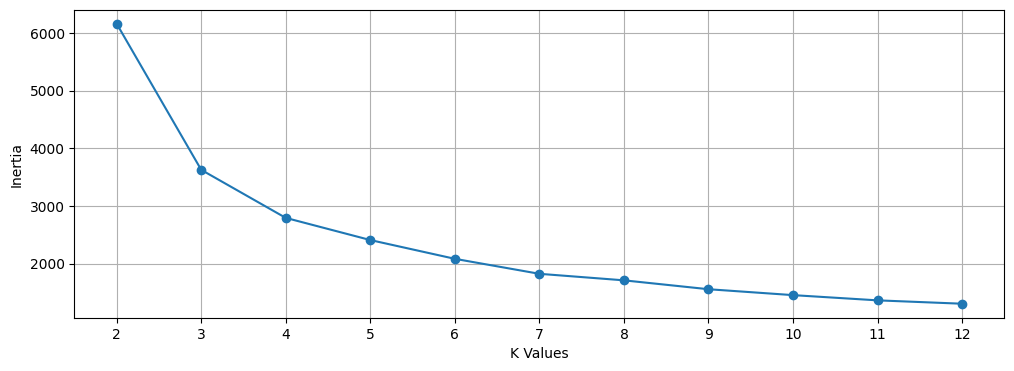

In [52]:
max_k=12
inertia=[]

k_values=range(2,max_k+1)

for k in k_values:
    kmeans=KMeans(n_clusters=k,random_state=42,max_iter=1000)
    kmeans.fit_predict(scaled_data_df)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(12,4))
plt.plot(k_values,inertia,marker='o')
plt.xticks(k_values)
plt.xlabel('K Values')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

In [53]:
#Inertia is the sum of squared distances between each data point and centriod of cluster.
#A metric to determine no of cluster
#Low Inertia value meaning all data points are compact and closest to the centroid and cluster is well-defined.

#From above graph, (As per Elbow method) after k=4 and 5, we dont see much drastic drop or difference in inertia.
#To confirm between k=4 or 5, we'll calculate and plot Silhoutte score


from sklearn.metrics import silhouette_score

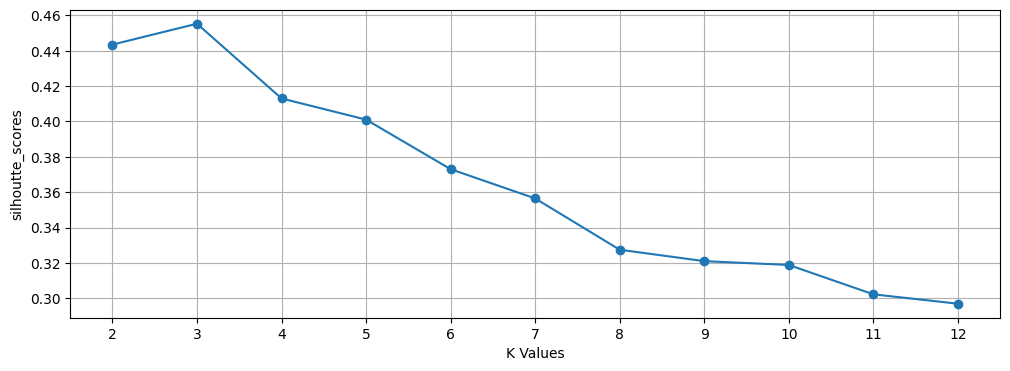

In [54]:
#Silhoutte score measures cohesion and seperation of data points checking,
# if there is any overlap between datapoints of different clusters meaning,
# How close each data point is to other data point within same cluster -Cohesion
# How Far each data point is to data point of nearest cluster -Seperation

#This score ranges between -1 to 1.
#Higher/Positive value indicates compact, well-defined clusters and NO OVERLAP between data points of different clusters.

max_k=12
silhoutte_scores=[]

k_values=range(2,max_k+1)

for k in k_values:
    kmeans=KMeans(n_clusters=k,random_state=42,max_iter=1000)
    cluster_labels=kmeans.fit_predict(scaled_data_df)
    sil_score=silhouette_score(scaled_data_df,cluster_labels)
    silhoutte_scores.append(sil_score)

plt.figure(figsize=(12,4))
plt.plot(k_values,silhoutte_scores,marker='o')
plt.xticks(k_values)
plt.xlabel('K Values')
plt.ylabel('silhoutte_scores')
plt.grid(True)
plt.show()

In [55]:
#As we cn see Silhoutte score of k=4 is greater than 5 meaning, Datapoints are compact, welldefined at K=4 than 5.
#Hence we go with K=5.

In [56]:
kmeans=KMeans(n_clusters=4,random_state=42,max_iter=1000)
cluster_labels=kmeans.fit_predict(scaled_data_df)
cluster_labels

array([0, 2, 2, ..., 0, 2, 1])

In [57]:
#We used scaled_data_df to calculate Clusters.
#Now that we have, we'll append cluster_labels to non_outlier_df

non_outliers_df['Cluster']=cluster_labels

In [58]:
non_outliers_df.head()

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency,Cluster
0,12346.0,144.02,2,2010-06-28 13:53:00,164,0
1,12347.0,966.87,2,2010-12-07 14:57:00,2,2
2,12348.0,221.16,1,2010-09-27 14:59:00,73,2
3,12349.0,1946.64,2,2010-10-28 08:23:00,42,1
4,12351.0,300.93,1,2010-11-29 15:23:00,10,2


In [59]:
non_outliers_df['Cluster'].unique()

array([0, 2, 1, 3])

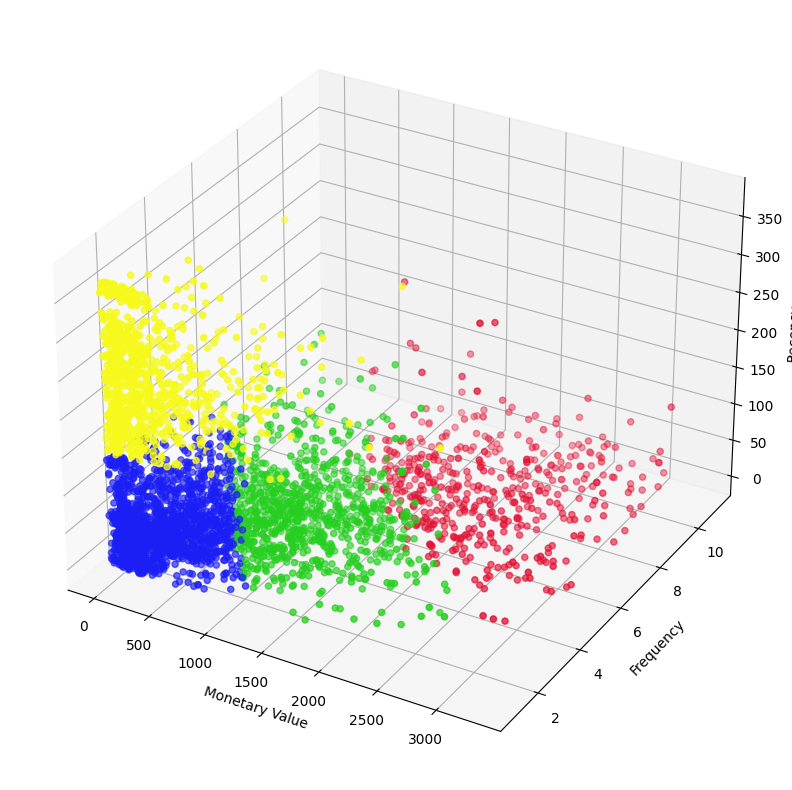

In [60]:
#Plotting 3d graph to visualize each cluster

cluster_colors={0:'#f6fa1b',1:'#25cf1f',2:'#1b1ff5',3:'#e31235'}

colors=non_outliers_df['Cluster'].map(cluster_colors)


fig=plt.figure(figsize=(8,8))
ax=fig.add_subplot(projection='3d')

scatter=ax.scatter(non_outliers_df['MonetaryValue'],non_outliers_df['Frequency'],non_outliers_df['Recency'],c=colors,marker='o')

ax.set_xlabel('Monetary Value')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')

plt.tight_layout()
plt.show()

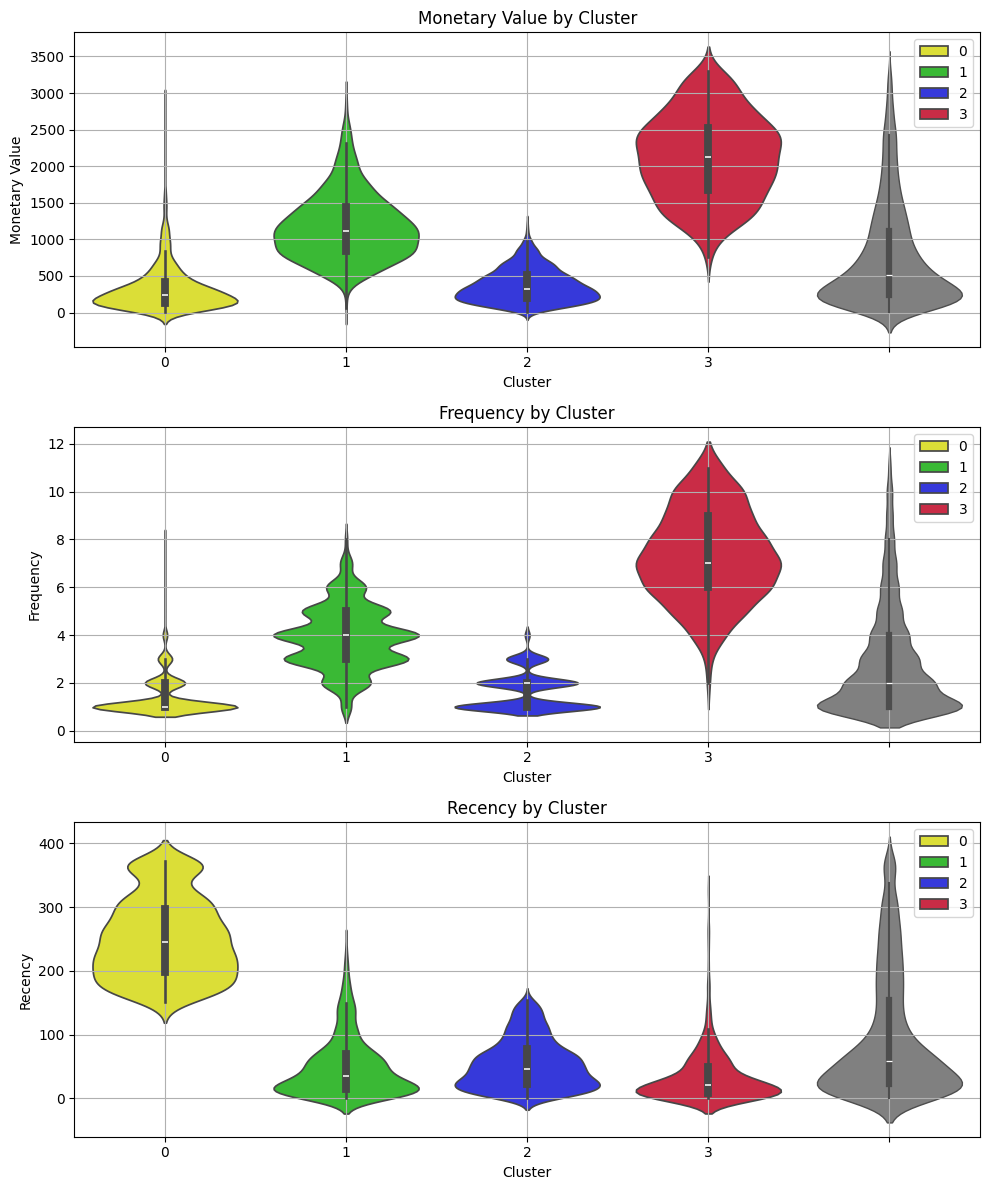

In [61]:
#Plotting Violin plot to see distribution of each feature data by cluster

plt.figure(figsize=(10, 12))

plt.subplot(3, 1, 1)
sns.violinplot(x=non_outliers_df['Cluster'], y=non_outliers_df['MonetaryValue'], palette=cluster_colors, hue=non_outliers_df["Cluster"])
sns.violinplot(y=non_outliers_df['MonetaryValue'], color='gray', linewidth=1.0)
plt.title('Monetary Value by Cluster')
plt.ylabel('Monetary Value')
plt.grid(True)

plt.subplot(3, 1, 2)
sns.violinplot(x=non_outliers_df['Cluster'], y=non_outliers_df['Frequency'], palette=cluster_colors, hue=non_outliers_df["Cluster"])
sns.violinplot(y=non_outliers_df['Frequency'], color='gray', linewidth=1.0)
plt.title('Frequency by Cluster')
plt.ylabel('Frequency')
plt.grid(True)


plt.subplot(3, 1, 3)
sns.violinplot(x=non_outliers_df['Cluster'], y=non_outliers_df['Recency'], palette=cluster_colors, hue=non_outliers_df["Cluster"])
sns.violinplot(y=non_outliers_df['Recency'], color='gray', linewidth=1.0)
plt.title('Recency by Cluster')
plt.ylabel('Recency')
plt.grid(True)

plt.tight_layout()
plt.show()

### Clusters and Their Descriptions

1. **Cluster 0 (Yellow): "Re-Engage"**
   - **Rationale**: This group includes lower-value, infrequent buyers who haven’t purchased recently. The focus should be on re-engagement to bring them back into active purchasing behavior.
   - **Action**: Use targeted marketing campaigns, special discounts, or reminders to encourage them to return and purchase again.


2. **Cluster 1 (Green): "Retain"**
   - **Rationale**: This cluster represents high-value customers who purchase regularly, though not always very recently. The focus should be on retention efforts to maintain their loyalty and spending levels.
   - **Action**: Implement loyalty programs, personalized offers, and regular engagement to ensure they remain active.

3. **Cluster 2 (Blue): "Nurture"**
   - **Rationale**: This cluster represents the least active and lowest-value customers, but they have made recent purchases. These customers may be new or need nurturing to increase their engagement and spending.
   - **Action**: Focus on building relationships, providing excellent customer service, and offering incentives to encourage more frequent purchases.

4. **Cluster 3 (Red): "Reward"**
   - **Rationale**: This cluster includes high-value, very frequent buyers, many of whom are still actively purchasing. They are your most loyal customers, and rewarding their loyalty is key to maintaining their engagement.
   - **Action**: Implement a robust loyalty program, provide exclusive offers, and recognize their loyalty to keep them engaged and satisfied.

---

### Summary of Cluster Names:
- **Cluster 0 (Yellow)**: "Re-Engage"
- **Cluster 1 (Green)**: "Retain"
- **Cluster 2 (Blue)**: "Nurture"
- **Cluster 3 (Red)**: "Reward"


## Outliers Analysis

In [64]:
#Removing overlapping values, Assigning cluster numbers and concating outliers data

overlap_indices = monetary_outliers_df.index.intersection(frequency_outliers_df.index)

monetary_only_outliers = monetary_outliers_df.drop(overlap_indices)
frequency_only_outliers = frequency_outliers_df.drop(overlap_indices)
monetary_and_frequency_outliers = monetary_outliers_df.loc[overlap_indices]

monetary_only_outliers["Cluster"] = -1
frequency_only_outliers["Cluster"] = -2
monetary_and_frequency_outliers["Cluster"] = -3

outlier_clusters_df = pd.concat([monetary_only_outliers, frequency_only_outliers, monetary_and_frequency_outliers])

outlier_clusters_df.head()

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency,Cluster
9,12357.0,10468.27,1,2010-11-16 10:05:00,23,-1
25,12380.0,4131.84,4,2010-08-31 14:54:00,100,-1
41,12409.0,11171.42,4,2010-10-15 10:24:00,55,-1
47,12415.0,17985.44,4,2010-11-29 15:07:00,10,-1
59,12429.0,3515.55,5,2010-12-09 12:05:00,0,-1


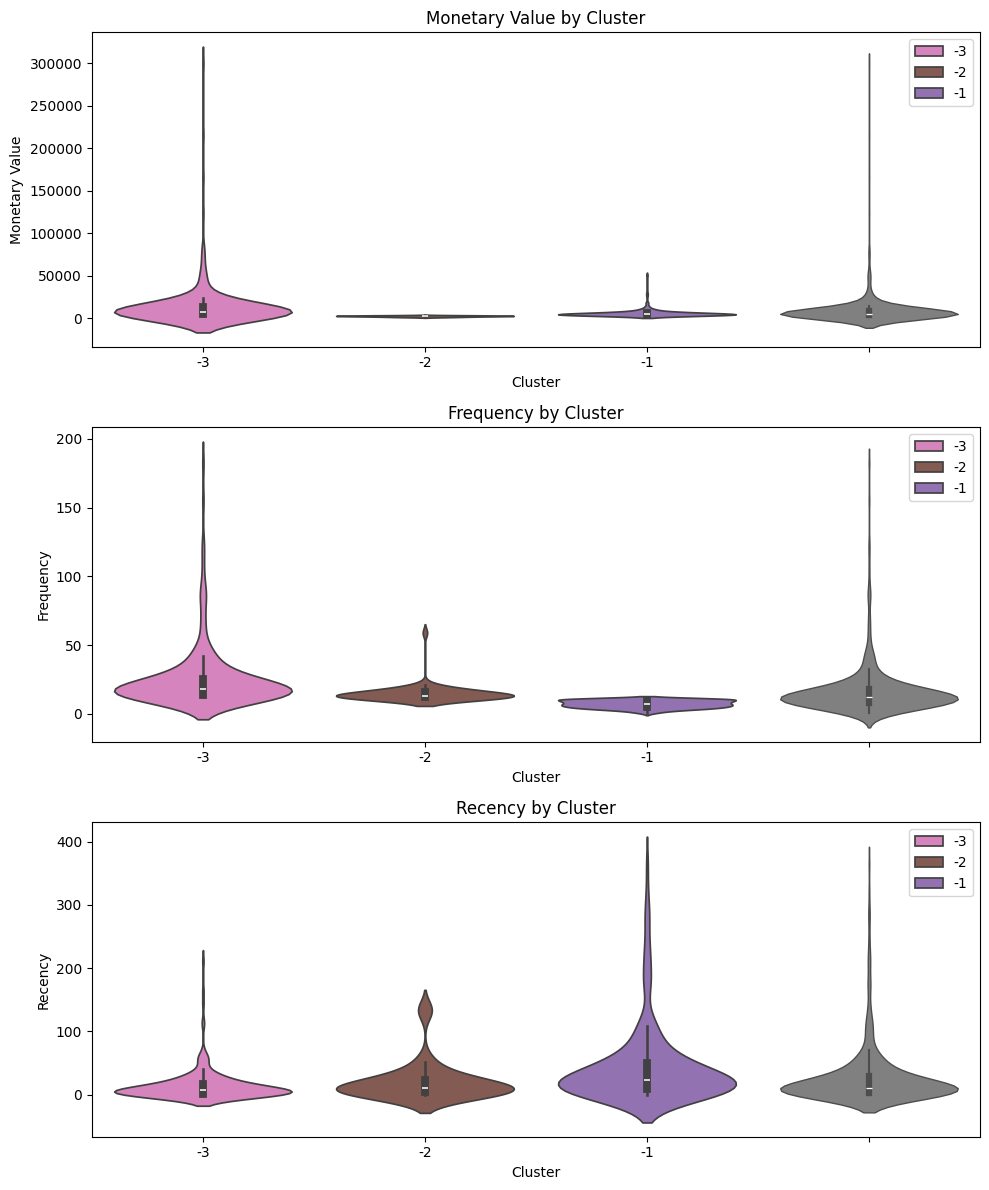

In [65]:
cluster_colors = {-1: '#9467bd',
                  -2: '#8c564b',
                  -3: '#e377c2'}

plt.figure(figsize=(10, 12))

plt.subplot(3, 1, 1)
sns.violinplot(x=outlier_clusters_df['Cluster'], y=outlier_clusters_df['MonetaryValue'], palette=cluster_colors, hue=outlier_clusters_df["Cluster"])
sns.violinplot(y=outlier_clusters_df['MonetaryValue'], color='gray', linewidth=1.0)
plt.title('Monetary Value by Cluster')
plt.ylabel('Monetary Value')

plt.subplot(3, 1, 2)
sns.violinplot(x=outlier_clusters_df['Cluster'], y=outlier_clusters_df['Frequency'], palette=cluster_colors, hue=outlier_clusters_df["Cluster"])
sns.violinplot(y=outlier_clusters_df['Frequency'], color='gray', linewidth=1.0)
plt.title('Frequency by Cluster')
plt.ylabel('Frequency')

plt.subplot(3, 1, 3)
sns.violinplot(x=outlier_clusters_df['Cluster'], y=outlier_clusters_df['Recency'], palette=cluster_colors, hue=outlier_clusters_df["Cluster"])
sns.violinplot(y=outlier_clusters_df['Recency'], color='gray', linewidth=1.0)
plt.title('Recency by Cluster')
plt.ylabel('Recency')

plt.tight_layout()
plt.show()

## Cluster Descriptions for Outliers

### Cluster -1 (Monetary Outliers): **PAMPER**
**Characteristics**: High spenders but not necessarily frequent buyers. Their purchases are large but infrequent.  
**Potential Strategy**: Focus on maintaining their loyalty with personalized offers or luxury services that cater to their high spending capacity.

---

### Cluster -2 (Frequency Outliers): **UPSELL**
**Characteristics**: Frequent buyers who spend less per purchase. These customers are consistently engaged but might benefit from upselling opportunities.  
**Potential Strategy**: Implement loyalty programs or bundle deals to encourage higher spending per visit, given their frequent engagement.

---

### Cluster -3 (Monetary & Frequency Outliers): **DELIGHT**
**Characteristics**: The most valuable outliers, with extreme spending and frequent purchases. They are likely your top-tier customers who require special attention.  
**Potential Strategy**: Develop VIP programs or exclusive offers to maintain their loyalty and encourage continued engagement.


In [67]:
cluster_labels = {
    0: "RE-ENGAGE",
    1: "RETAIN",
    2: "NURTURE",
    3: "REWARD",
    -1: "PAMPER",
    -2: "UPSELL",
    -3: "DELIGHT"
}

In [68]:
#Concating non-outliers and outliers data

full_clustering_df = pd.concat([non_outliers_df, outlier_clusters_df])

full_clustering_df.head()

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency,Cluster
0,12346.0,144.02,2,2010-06-28 13:53:00,164,0
1,12347.0,966.87,2,2010-12-07 14:57:00,2,2
2,12348.0,221.16,1,2010-09-27 14:59:00,73,2
3,12349.0,1946.64,2,2010-10-28 08:23:00,42,1
4,12351.0,300.93,1,2010-11-29 15:23:00,10,2


In [69]:
full_clustering_df["ClusterLabel"] = full_clustering_df["Cluster"].map(cluster_labels)

full_clustering_df.head()

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency,Cluster,ClusterLabel
0,12346.0,144.02,2,2010-06-28 13:53:00,164,0,RE-ENGAGE
1,12347.0,966.87,2,2010-12-07 14:57:00,2,2,NURTURE
2,12348.0,221.16,1,2010-09-27 14:59:00,73,2,NURTURE
3,12349.0,1946.64,2,2010-10-28 08:23:00,42,1,RETAIN
4,12351.0,300.93,1,2010-11-29 15:23:00,10,2,NURTURE


## Visualization

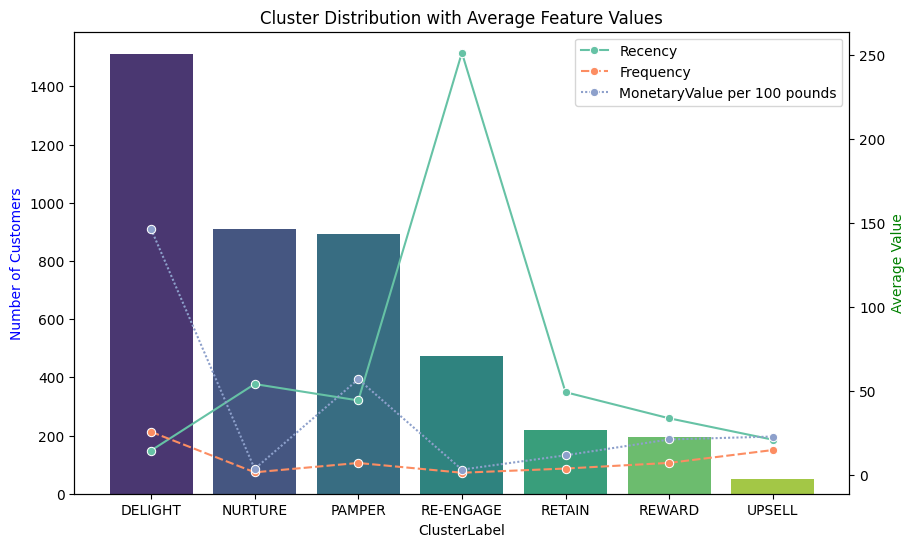

In [71]:
cluster_counts = full_clustering_df['ClusterLabel'].value_counts()
full_clustering_df["MonetaryValue per 100 pounds"] = full_clustering_df["MonetaryValue"] / 100.00
feature_means = full_clustering_df.groupby('ClusterLabel')[['Recency', 'Frequency', 'MonetaryValue per 100 pounds']].mean()

fig, ax1 = plt.subplots(figsize=(10, 6))

sns.barplot(x=cluster_counts.index, y=cluster_counts.values, ax=ax1, palette='viridis', hue=cluster_counts.index)
ax1.set_ylabel('Number of Customers', color='b')
ax1.set_title('Cluster Distribution with Average Feature Values')

ax2 = ax1.twinx()

sns.lineplot(data=feature_means, ax=ax2, palette='Set2', marker='o')
ax2.set_ylabel('Average Value', color='g')

plt.show()